<a href="https://colab.research.google.com/github/malinred/ML_Practice_codes/blob/main/ML_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#AYUSH JOHN DANIEL
#BL.EN.U4AIE23150
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
#A1
data = pd.read_csv('/content/dataset.csv')
class1 = 'YP.NE49'
class2 = 'JP.ASAJ'

data_1 = data[data['station_id'] == class1_id]
data_2 = data[data['station_id'] == class2_id]

feature_columns = ['mean', 'std', 'max', 'peak_to_peak', 'rms',
                   'dominant_freq', 'spectral_centroid', 'energy']

centroid1 = data_1[feature_columns].mean(axis=0)
centroid2 = data_2[feature_columns].mean(axis=0)

spread1 = data_1[feature_columns].std(axis=0)
spread2 = data_2[feature_columns].std(axis=0)



print("Centroid_1:\n mean", centroid1)
print("std:\n", spread1)
print("-----------------------------")
print("Centroid_2:\n", centroid2)
print("std:\n", spread2)
print("-----------------------------")
print(f"\nEuclidean distance between centroids: {np.linalg.norm(centroid1 - centroid2)}")

Centroid_1:
 mean mean                -2.607268e+01
std                  6.349349e+05
max                  1.374053e+06
peak_to_peak         2.393121e+06
rms                  6.405649e+05
dominant_freq        3.906250e-01
spectral_centroid    1.088457e+00
energy               7.298387e+15
dtype: float64
std:
 mean                 1.322991e+05
std                  9.061825e+05
max                  1.939563e+06
peak_to_peak         3.290763e+06
rms                  9.117370e+05
dominant_freq        0.000000e+00
spectral_centroid    1.172949e+00
energy               1.416300e+16
dtype: float64
-----------------------------
Centroid_2:
 mean                 4.504825e+02
std                  1.428018e+06
max                  3.657291e+06
peak_to_peak         5.343918e+06
rms                  2.191240e+06
dominant_freq        3.906250e-01
spectral_centroid    4.521832e-01
energy               4.657034e+16
dtype: float64
std:
 mean                 1.752614e+06
std                  1.682159e+0

Histogram Counts: (array([3153,   24,    3,    5,    3,    0,    1,    2,    4,    3]), array([0.00000000e+00, 4.41274970e+17, 8.82549940e+17, 1.32382491e+18,
       1.76509988e+18, 2.20637485e+18, 2.64764982e+18, 3.08892479e+18,
       3.53019976e+18, 3.97147473e+18, 4.41274970e+18]))
Mean of energy column: 3.644793527871601e+16
Variance of energy column: 5.612554930363698e+34


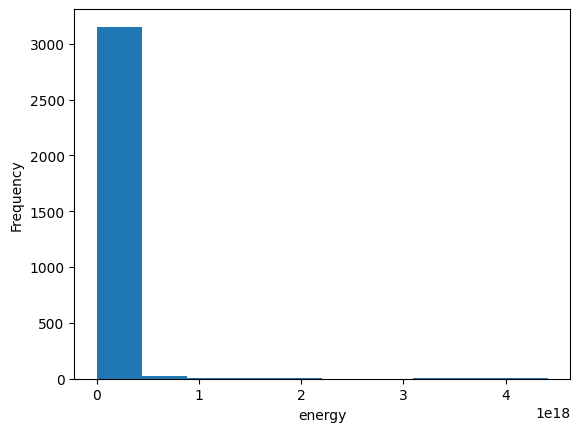

In [32]:
#A2
feature_data = data['energy']
hist_counts = np.histogram(feature_data)
print("Histogram Counts:", hist_counts)


feature_mean = np.mean(feature_data)
feature_variance = np.var(feature_data)
print(f"Mean of energy column:", feature_mean)
print(f"Variance of energy column:", feature_variance)

plt.hist(feature_data)
plt.xlabel("energy")
plt.ylabel('Frequency')
plt.show()

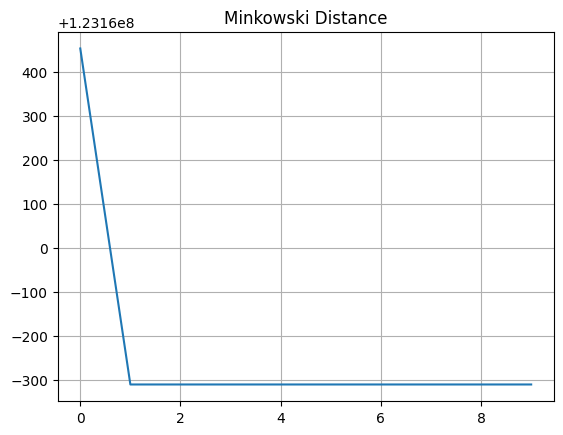

In [33]:
#A3
# minkowski distance is generalization of euclidean distance and manhattan distance depending on the r value that you input

vec1 = data.loc[0, feature_columns].values.astype(float)
vec2 = data.loc[1, feature_columns].values.astype(float)

minkowski_distances = []
for r in range(1, 11):
    minkowski_distances.append(np.linalg.norm(vec1 - vec2, ord=r))


plt.plot(minkowski_distances)
plt.title('Minkowski Distance')
plt.grid(True)
plt.show()


In [34]:
#A4
selected_classes = ['YP.NE49', 'JP.ASAJ']
fil = data[data['station_id'].isin(selected_classes)]

X = fil[feature_columns]
y = fil['station_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (46, 8)
Test set size: (20, 8)


In [35]:
#A5
temp = KNeighborsClassifier(n_neighbors=3)
temp.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
#A6
accuracy = temp.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7


In [37]:
#A7
pred = temp.predict(X_test)
print(pred)
print("------------------------------")
print(y_test.values)

['JP.ASAJ' 'YP.NE49' 'YP.NE49' 'YP.NE49' 'JP.ASAJ' 'JP.ASAJ' 'JP.ASAJ'
 'JP.ASAJ' 'YP.NE49' 'YP.NE49' 'JP.ASAJ' 'JP.ASAJ' 'JP.ASAJ' 'YP.NE49'
 'JP.ASAJ' 'JP.ASAJ' 'YP.NE49' 'YP.NE49' 'JP.ASAJ' 'YP.NE49']
------------------------------
['JP.ASAJ' 'YP.NE49' 'JP.ASAJ' 'YP.NE49' 'JP.ASAJ' 'YP.NE49' 'JP.ASAJ'
 'JP.ASAJ' 'YP.NE49' 'JP.ASAJ' 'JP.ASAJ' 'YP.NE49' 'JP.ASAJ' 'JP.ASAJ'
 'JP.ASAJ' 'JP.ASAJ' 'JP.ASAJ' 'YP.NE49' 'JP.ASAJ' 'YP.NE49']


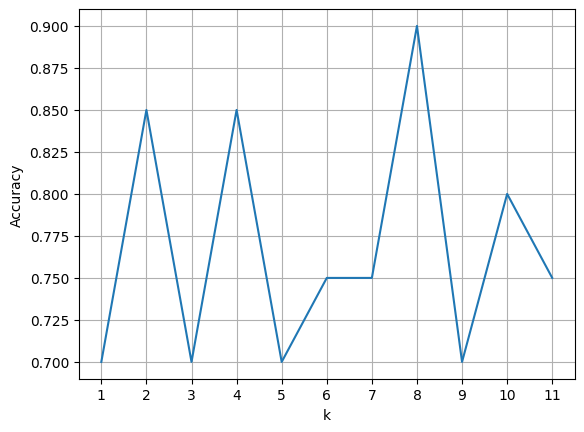

In [38]:
#A8
accuracies = []

for k in range(1, 12):
    temp = KNeighborsClassifier(n_neighbors=k)
    temp.fit(X_train, y_train)
    accuracy = temp.score(X_test, y_test)
    accuracies.append(accuracy)


plt.plot(range(1, 12), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

In [39]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[9 4]
 [2 5]]
              precision    recall  f1-score   support

     JP.ASAJ       0.82      0.69      0.75        13
     YP.NE49       0.56      0.71      0.62         7

    accuracy                           0.70        20
   macro avg       0.69      0.70      0.69        20
weighted avg       0.73      0.70      0.71        20

